<a href="https://colab.research.google.com/github/2840bongkoch/dataviz2025/blob/main/bongkoch_Visualize_Data_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# การแสดงผลการกระจายของข้อมูล

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_to_stopandsearch = '/content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-bedfordshire-stop-and-search.csv'
stopandsearch_df = pd.read_csv(path_to_stopandsearch)
stopandsearch_df.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Female,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


แปลงค่า Gender และ Age range เป็นจำนวนจริง

In [4]:
stopandsearch_df.groupby('Gender').count()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
Gender,,,,,,,,,,,,,,
Female,40,40,40,0,34,34,40,39,37,40,40,40,10,40
Male,287,287,287,0,240,240,278,280,276,287,287,287,107,287


In [5]:
stopandsearch_df.groupby('Age range').count()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
Age range,,,,,,,,,,,,,,
10-17,45,45,45,0,39,39,43,42,42,45,45,45,17,45
18-24,99,99,99,0,84,84,84,96,97,99,99,99,41,99
25-34,80,80,80,0,63,63,71,79,75,80,80,80,32,80
over 34,126,126,126,0,104,104,119,122,122,126,126,126,40,126
under 10,1,1,1,0,1,1,1,1,1,1,1,1,0,1


In [6]:
stopandsearch_df.shape

(387, 15)

In [7]:
stopandsearch_df_dropna = stopandsearch_df.dropna(subset=['Age range','Gender'])

In [8]:
stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'].replace({'Female': 1, 'Male': 35})
stopandsearch_df_dropna['Age range'] = stopandsearch_df_dropna['Age range'].replace({'under 10': 10, 'over 34': 34,
                                                                                     '25-34':30,'18-24':21,'10-17':14})

/tmp/ipython-input-3376285857.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'].replace({'Female': 1, 'Male': 35})
/tmp/ipython-input-3376285857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'].replace({'Female': 1, 'Male': 35})
/tmp/ipython-input-3376285857.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain 

### สร้าง list ของ ตัวเลข random number ที่เป็น normal distribution

In [9]:
import numpy as np
list_of_rn = np.random.normal(loc=1, scale=0.1, size=len(stopandsearch_df_dropna))

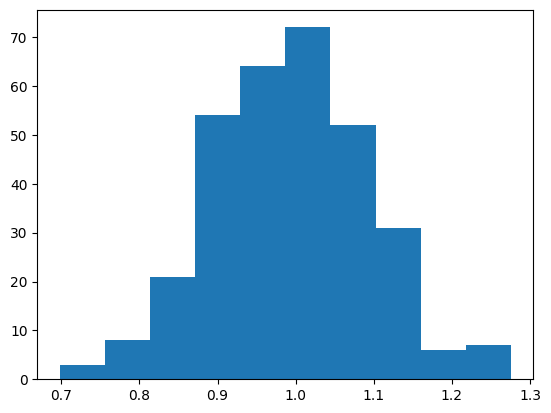

In [80]:
plt.hist(list_of_rn);

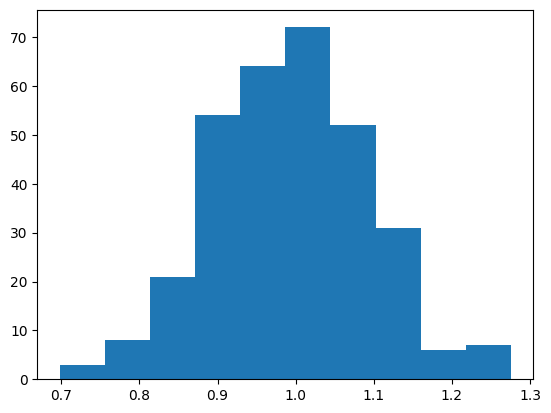

In [81]:
hist_out = plt.hist(list_of_rn);

In [78]:
hist_out

(array([ 3.,  8., 21., 54., 64., 72., 52., 31.,  6.,  7.]),
 array([0.69821152, 0.75592925, 0.81364698, 0.87136471, 0.92908244,
        0.98680017, 1.04451789, 1.10223562, 1.15995335, 1.21767108,
        1.27538881]),
 <BarContainer object of 10 artists>)

In [77]:
hist_out[0]

array([ 3.,  8., 21., 54., 64., 72., 52., 31.,  6.,  7.])

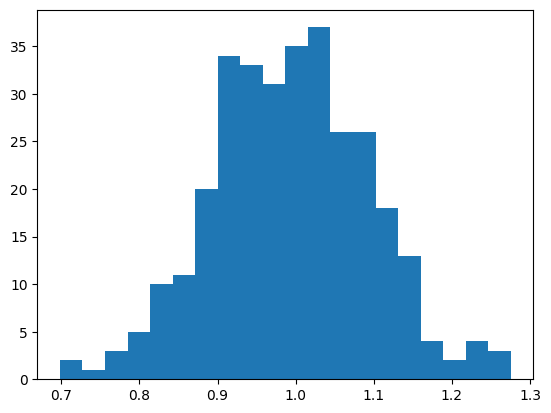

In [82]:
hist_out = plt.hist(list_of_rn, bins=20)

In [11]:
stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'] * list_of_rn

/tmp/ipython-input-864405060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'] * list_of_rn


In [12]:
stopandsearch_df_dropna['Age range'] = stopandsearch_df_dropna['Age range'] * np.random.normal(loc=1, scale=0.01, size=len(stopandsearch_df_dropna))

/tmp/ipython-input-2945934892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stopandsearch_df_dropna['Age range'] = stopandsearch_df_dropna['Age range'] * np.random.normal(loc=1, scale=0.01, size=len(stopandsearch_df_dropna))


### ลบค่าที่เป็น outliers

In [13]:
stopandsearch_df_dropna = stopandsearch_df_dropna[(stopandsearch_df_dropna['Gender']>=0) & (stopandsearch_df_dropna['Gender']<40)]

In [14]:
stopandsearch_df_dropna.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,36.333429,30.040731,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,37.700502,14.092859,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,35.790837,13.831043,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,1.001900,14.033471,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,37.728809,14.127290,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


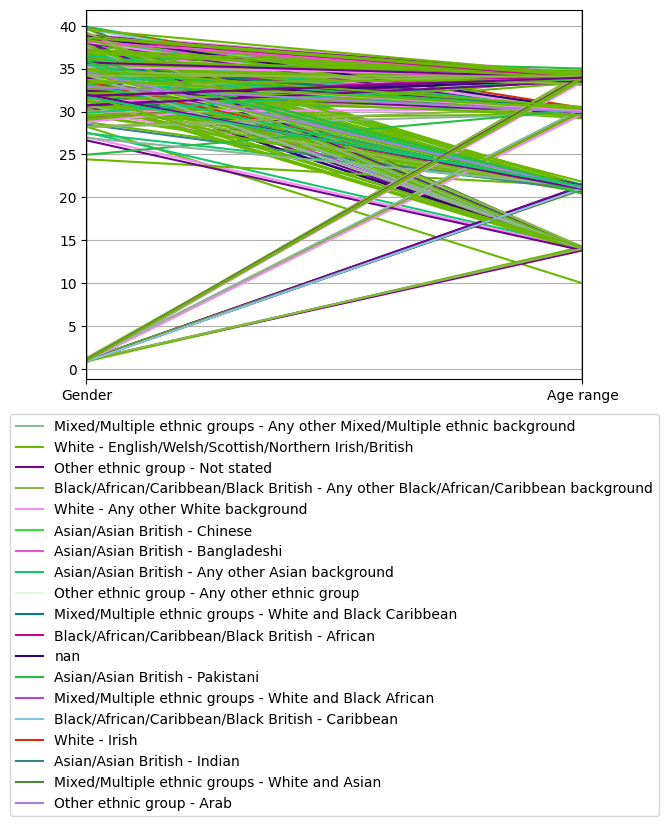

In [15]:
pd.plotting.parallel_coordinates(stopandsearch_df_dropna[['Gender','Age range','Self-defined ethnicity']],'Self-defined ethnicity')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -1.2))

# Scatter plot

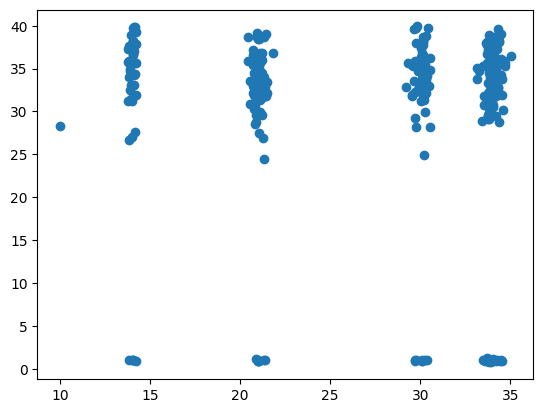

In [16]:
plt.scatter(stopandsearch_df_dropna['Age range'],stopandsearch_df_dropna['Gender'])

## เปลี่ยนความโปร่งใส เพื่อดูข้อมูลที่ทับกัน

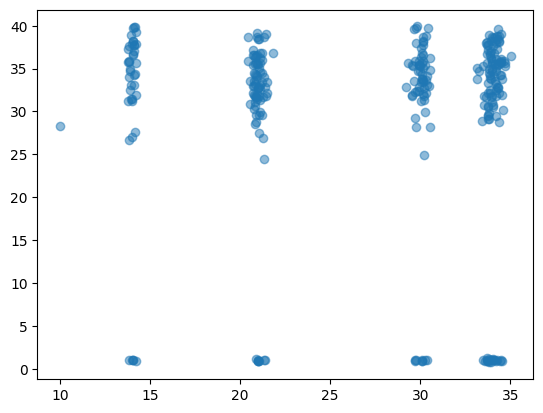

In [17]:
plt.scatter(stopandsearch_df_dropna['Age range'],stopandsearch_df_dropna['Gender'], alpha=0.5)

## เปลี่ยนสี

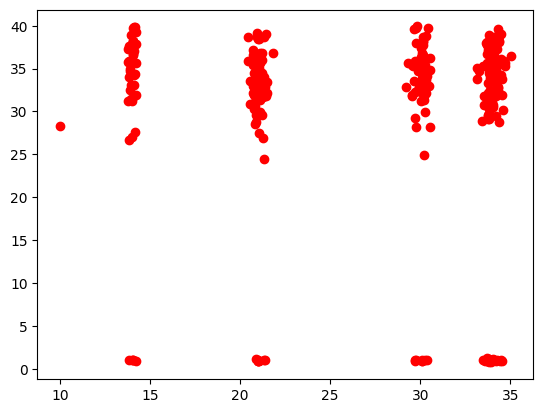

In [18]:
plt.scatter(stopandsearch_df_dropna['Age range'],stopandsearch_df_dropna['Gender'], c='r')

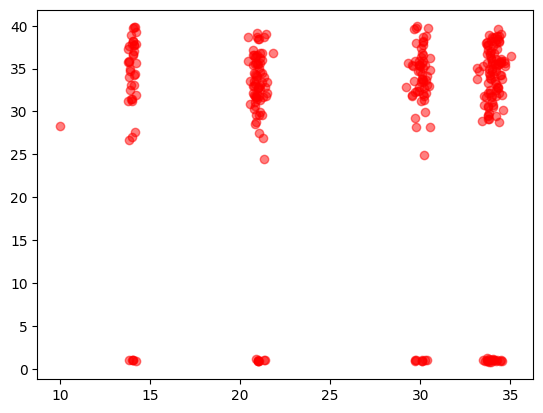

In [19]:
plt.scatter(stopandsearch_df_dropna['Age range'],stopandsearch_df_dropna['Gender'], c='r', alpha=0.5)

## ใช้ค่าสีในการแสดงค่าของคอลัมน์อื่น

ตัวอย่าง column > Officer-defined ethnicity

In [20]:
stopandsearch_df.groupby('Officer-defined ethnicity').count()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
Officer-defined ethnicity,,,,,,,,,,,,,,
Asian,81,81,81,0,64,64,75,77,79,81,81,81,30,81
Black,64,64,64,0,52,52,51,62,63,64,64,64,26,64
Other,9,9,9,0,6,6,8,9,9,9,9,9,5,9
White,199,199,199,0,168,168,179,189,191,199,199,199,66,199


แทนค่า str ด้วย ตัวเลข

In [21]:
stopandsearch_df_dropna['Officer-defined ethnicity'] = stopandsearch_df_dropna['Officer-defined ethnicity'].replace({'Black': 0, 'Other': 1, 'Asian': 2, 'White': 3})

/tmp/ipython-input-2112560830.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stopandsearch_df_dropna['Officer-defined ethnicity'] = stopandsearch_df_dropna['Officer-defined ethnicity'].replace({'Black': 0, 'Other': 1, 'Asian': 2, 'White': 3})


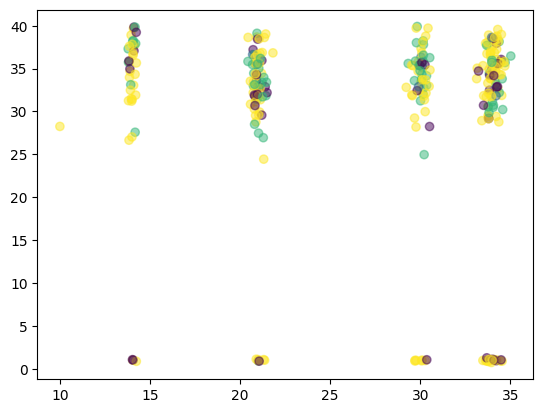

In [22]:
plt.scatter(stopandsearch_df_dropna['Age range'],stopandsearch_df_dropna['Gender'], c= stopandsearch_df_dropna['Officer-defined ethnicity'], alpha=0.5)

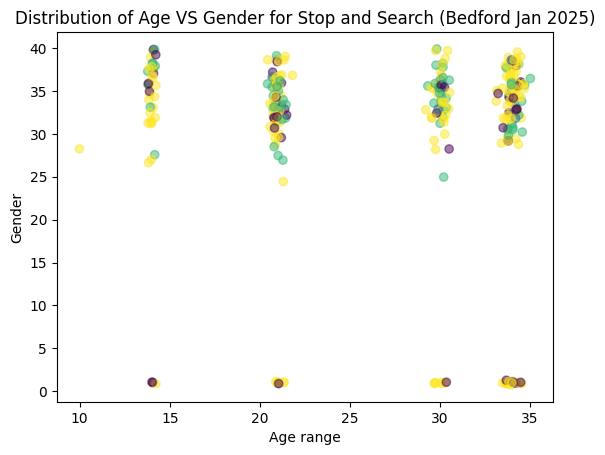

In [52]:
plt.scatter(stopandsearch_df_dropna['Age range'],stopandsearch_df_dropna['Gender'],
            c= stopandsearch_df_dropna['Officer-defined ethnicity'], alpha=0.5)
plt.title('Distribution of Age VS Gender for Stop and Search (Bedford Jan 2025)')
plt.xlabel('Age range')
plt.ylabel('Gender'); #; ทำให้ไม่มี output

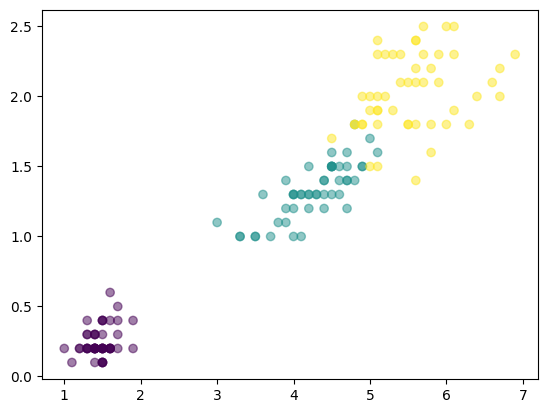

In [29]:
plt.scatter(df['PetalLength'],df['PetalWidth'],c=df2['Name'],alpha=0.5)

## ใช้ขนาดของ marker แสดงค่าของ feature

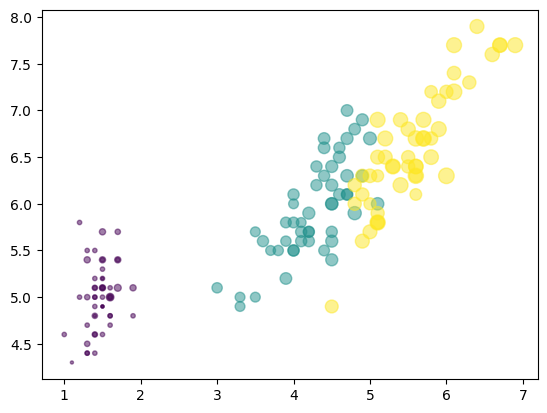

In [53]:
plt.scatter(df['PetalLength'],df['SepalLength'],s=50*df['PetalWidth'],c=df2['Name'],alpha=0.5);

## ตัวแปร Marker ใช้ในการเปลี่ยนหน้าตาของ marker

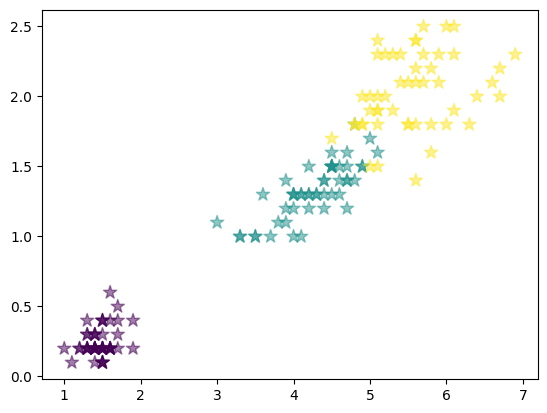

In [31]:
plt.scatter(df['PetalLength'],df['PetalWidth'],s=100,c=df2['Name'],alpha=0.5,marker='*')

## การ plot กราฟหลายๆอันซ้อนกัน

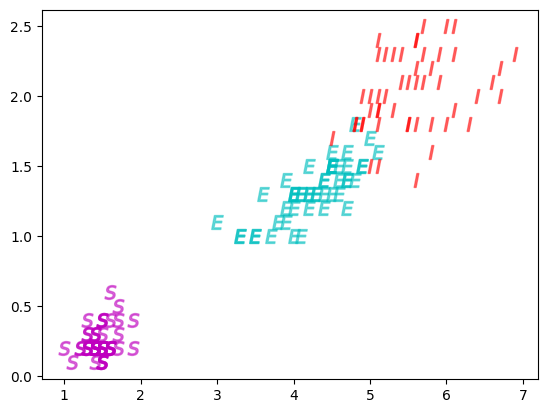

In [32]:
plt.scatter(df['PetalLength'][:50],df['PetalWidth'][:50],s=100,c='m',alpha=0.5,marker='$S$')
plt.scatter(df['PetalLength'][50:100],df['PetalWidth'][50:100],s=100,c='c',alpha=0.5,marker='$E$')
plt.scatter(df['PetalLength'][100:],df['PetalWidth'][100:],s=100,c='r',alpha=0.5,marker='$I$')

# plot-legend

In [23]:
df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
df2 = df.copy()
df2['Name'] = df2['Name'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df2

/tmp/ipython-input-819236344.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Name'] = df2['Name'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


###Label-Legend

```plt.plot()``` input  ตัวที่ 3 คือ ตัวกำหนดหน้าตาของ marker

'หน้าตาmarker'-'ลักษณะของเส้นเชื่อมจุด'-'สี'

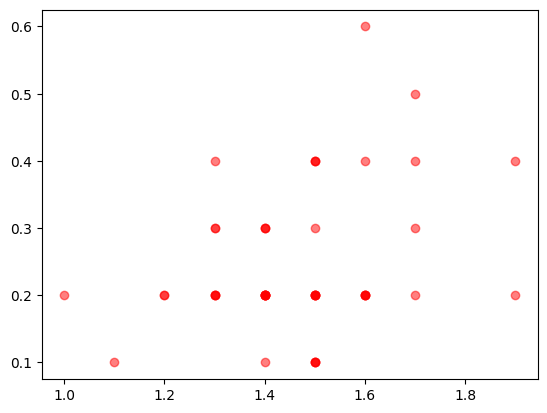

In [54]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'or',alpha=0.5)

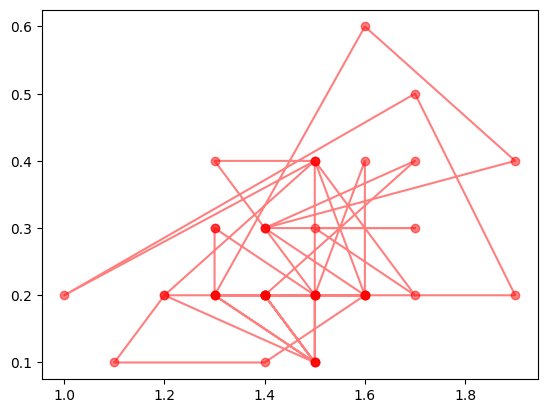

In [34]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'o-r',alpha=0.5)

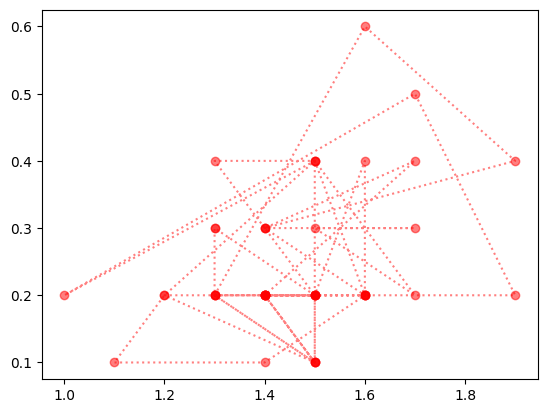

In [35]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'o:r',alpha=0.5)

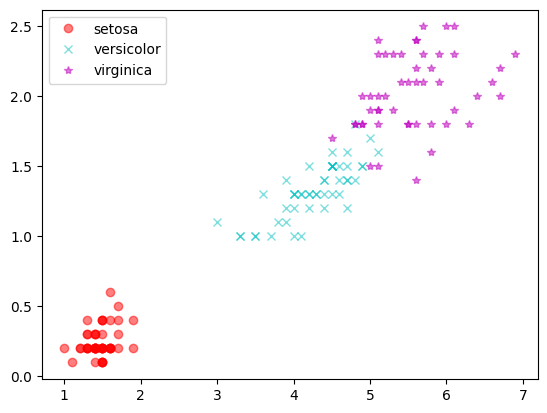

In [36]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'or',alpha=0.5,label='setosa')
plt.plot(df['PetalLength'][50:100],df['PetalWidth'][50:100],'xc',alpha=0.5,label='versicolor')
plt.plot(df['PetalLength'][100:],df['PetalWidth'][100:],'*m',alpha=0.5,label='virginica')
plt.legend()

### การใส่ชื่อกราฟ และชื่อแกน

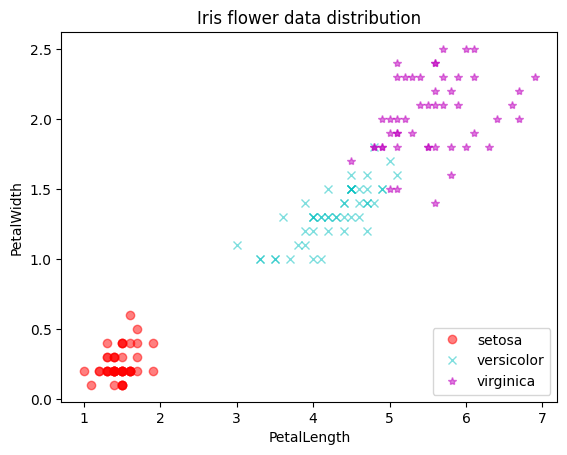

In [55]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'or',alpha=0.5,label='setosa')
plt.plot(df['PetalLength'][50:100],df['PetalWidth'][50:100],'xc',alpha=0.5,label='versicolor')
plt.plot(df['PetalLength'][100:],df['PetalWidth'][100:],'*m',alpha=0.5,label='virginica')
plt.legend(loc='lower right')
plt.title('Iris flower data distribution') ##ชื่อกราฟ
plt.xlabel('PetalLength') ##ชื่อแกน X
plt.ylabel('PetalWidth'); ##ชื่อแกน y

### 3D scatter

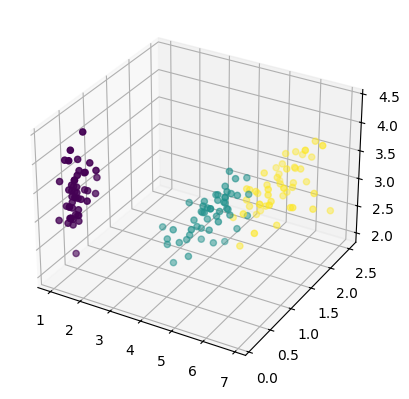

In [72]:
ax = plt.axes(projection ="3d")
ax.scatter3D(df['PetalLength'],df['PetalWidth'],df['SepalWidth'],c=df2['Name'])

## Bubble Chart

Scatter plot ที่ใช้ขนาดของ marker ในการสื่อปริมาณของข้อมูล

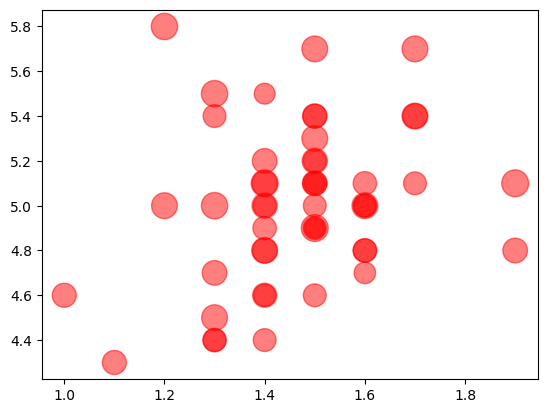

In [39]:
plt.scatter(df['PetalLength'][:50],df['SepalLength'][:50],s=150*df['PetalWidth'][100:],c='r',alpha=0.5)

### Example

### Box-plot

In [101]:
O['fliers'][0].get_xdata()

array([51.642262, 52.349993])

In [110]:
stopandsearch_df[(stopandsearch_df['Latitude']==O['fliers'][0].get_xdata()[0]) |
                (stopandsearch_df['Latitude']==O['fliers'][0].get_xdata()[1])]

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
53,Person search,2025-01-06T14:10:00+00:00,False,NaN,51.642262,-0.052279,Male,25-34,Other ethnic group - Not stated,NaN,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
80,Person search,2025-01-07T20:40:00+00:00,False,NaN,52.349993,-0.178056,Male,10-17,Other ethnic group - Not stated,Black,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False


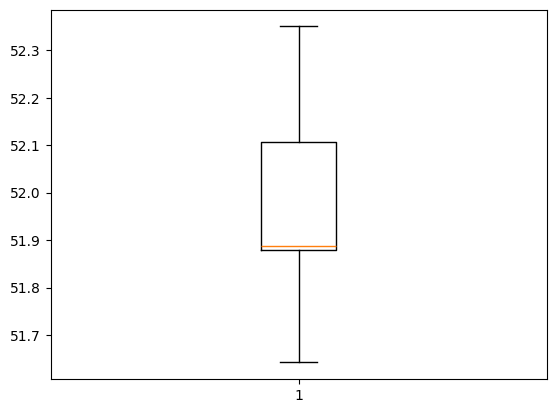

In [88]:
O = plt.boxplot(stopandsearch_df['Latitude'].dropna());

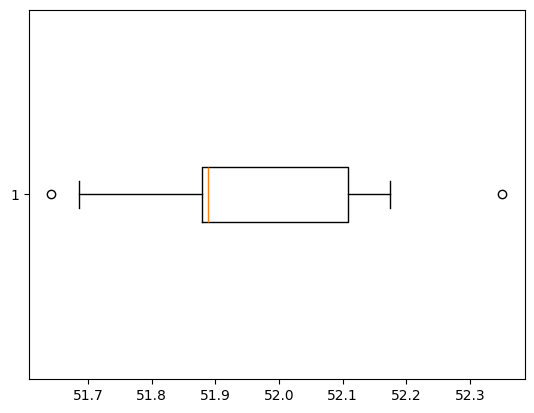

In [91]:
O = plt.boxplot(stopandsearch_df['Latitude'].dropna(), whis=1, vert=False)

In [93]:
O

{'whiskers': [<matplotlib.lines.Line2D at 0x7ccd429954f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ccd42995a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ccd42995280>],
 'medians': [<matplotlib.lines.Line2D at 0x7ccd42996030>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ccd42996300>],
 'means': []}

In [98]:
O['fliers']

In [99]:
O['fliers'][0]

In [100]:
dir(O['fliers'][0])

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiased',
 '_axes',
 '_callbacks',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_color',
 '_dash_pattern',
 '_dashcapstyle',
 '_dashjoinstyle',
 '_different_canvas',
 '_drawStyles_l',
 '_drawStyles_s',
 '_drawstyle',
 '_fully_clipped_to_axes',
 '_gapcolor',
 '_get_markerfacecolor',
 '_get_transformed_path',
 '_gid',
 '_in_layout',
 '_internal_update',
 '_invalidx',
 '_invalidy',
 '_label',
 '_lineStyles',
 '_linestyle',
 '_linestyles',
 '_linewidth',
 '_marker',
 '_markeredgecolor',
 '_markeredgewidth',
 '_markerfac

In [112]:
stopandsearch_df[(stopandsearch_df['Latitude']==O['fliers'][0].get_xdata()[0]) |
                (stopandsearch_df['Latitude']==O['fliers'][0].get_xdata()[1])]

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
53,Person search,2025-01-06T14:10:00+00:00,False,NaN,51.642262,-0.052279,Male,25-34,Other ethnic group - Not stated,NaN,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
80,Person search,2025-01-07T20:40:00+00:00,False,NaN,52.349993,-0.178056,Male,10-17,Other ethnic group - Not stated,Black,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False


In [116]:
O['whiskers'][0].get_xdata()

array([51.879602, 51.685394])

In [118]:
O['caps'][0].get_xdata()

array([51.685394, 51.685394])

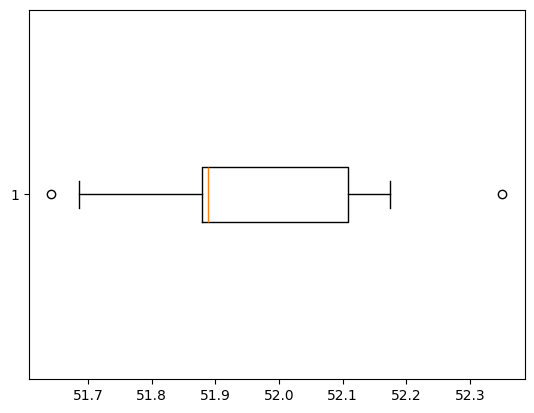

In [117]:
O = plt.boxplot(stopandsearch_df['Latitude'].dropna(), whis=1, vert=False)

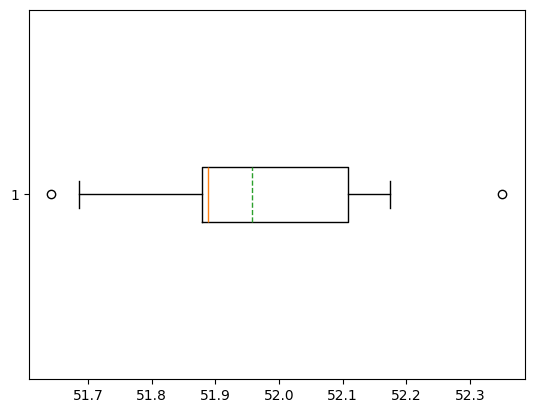

In [119]:
O = plt.boxplot(stopandsearch_df['Latitude'].dropna(), whis=1, vert=False,showmeans=True,meanline=True)

# Subplot

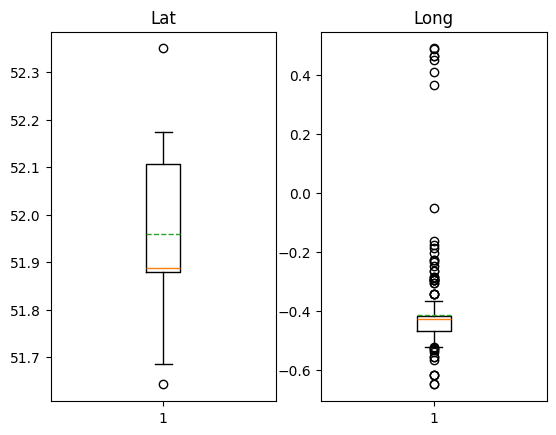

In [125]:
plt.subplot(1, 2, 1)
plt.boxplot(stopandsearch_df['Latitude'].dropna(), whis=1, vert=True,showmeans=True,meanline=True)
plt.title('Lat')
plt.subplot(1, 2, 2)
plt.boxplot(stopandsearch_df['Longitude'].dropna(), whis=1, vert=True,showmeans=True,meanline=True)
plt.title('Long');

# Quiz10 แก้โค้ดของกราฟข้างบนให้แสดง boxplot ในแนวนอน และ boxplot ของ lat อยู่บน ของ long อยู่ล่าง

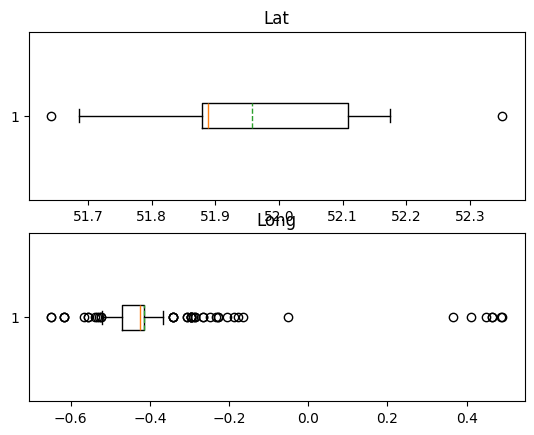

In [126]:
plt.subplot(2, 1, 1)
plt.boxplot(stopandsearch_df['Latitude'].dropna(), whis=1, vert=False,showmeans=True,meanline=True)
plt.title('Lat')
plt.subplot(2, 1, 2)
plt.boxplot(stopandsearch_df['Longitude'].dropna(), whis=1, vert=False,showmeans=True,meanline=True)
plt.title('Long');

# Quiz 11 plot กราฟ 3 อันในแนวทแยงมุม
1. boxplot
2. scatter
3. histogram

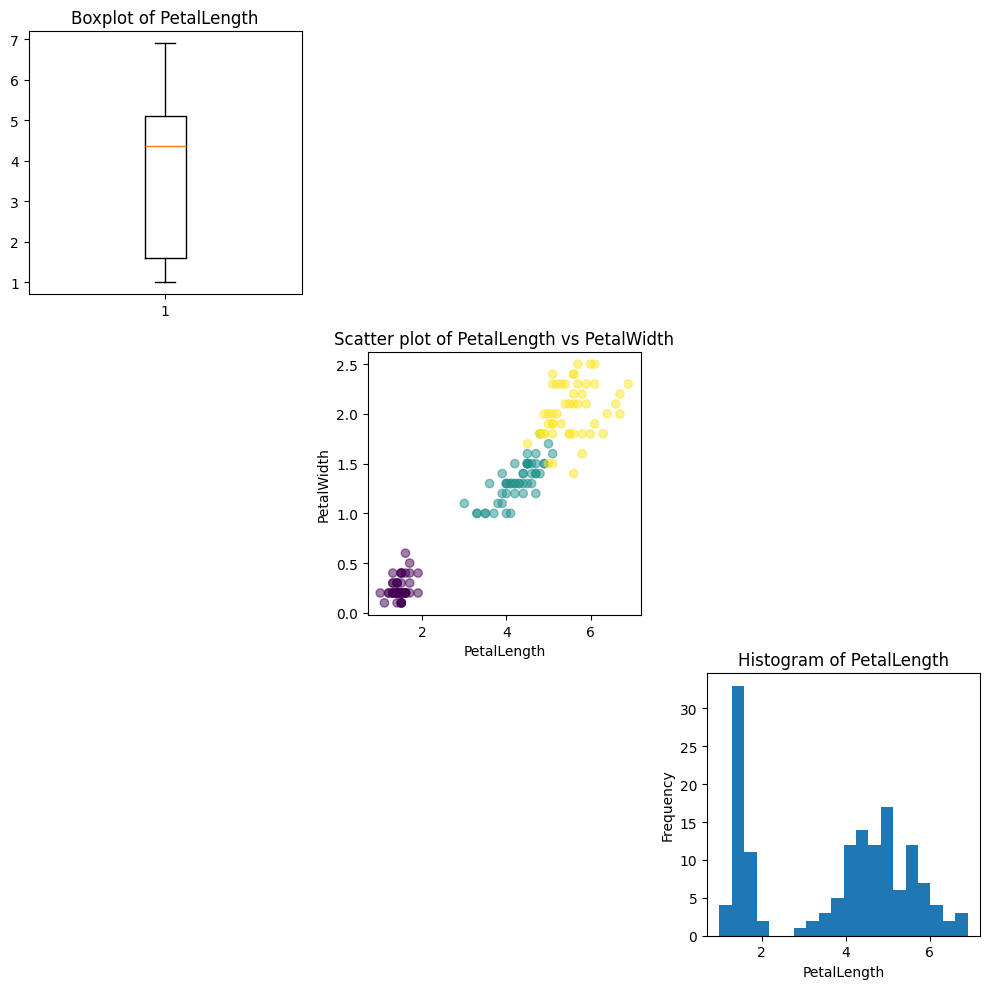

In [127]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# Boxplot ใน subplot แรก (แนวทแยงมุม)
axes[0, 0].boxplot(df['PetalLength'].dropna())
axes[0, 0].set_title('Boxplot of PetalLength')

# Scatter plot ใน subplot ที่สอง (แนวทแยงมุม)
axes[1, 1].scatter(df['PetalLength'], df['PetalWidth'], c=df2['Name'], alpha=0.5)
axes[1, 1].set_title('Scatter plot of PetalLength vs PetalWidth')
axes[1, 1].set_xlabel('PetalLength')
axes[1, 1].set_ylabel('PetalWidth')

# Histogram ใน subplot ที่สาม (แนวทแยงมุม)
axes[2, 2].hist(df['PetalLength'].dropna(), bins=20)
axes[2, 2].set_title('Histogram of PetalLength')
axes[2, 2].set_xlabel('PetalLength')
axes[2, 2].set_ylabel('Frequency')

# ปิด subplot ที่ไม่ได้ใช้งาน (นอกแนวทแยงมุม)
axes[0, 1].axis('off')
axes[0, 2].axis('off')
axes[1, 0].axis('off')
axes[1, 2].axis('off')
axes[2, 0].axis('off')
axes[2, 1].axis('off')


plt.tight_layout()
plt.show()

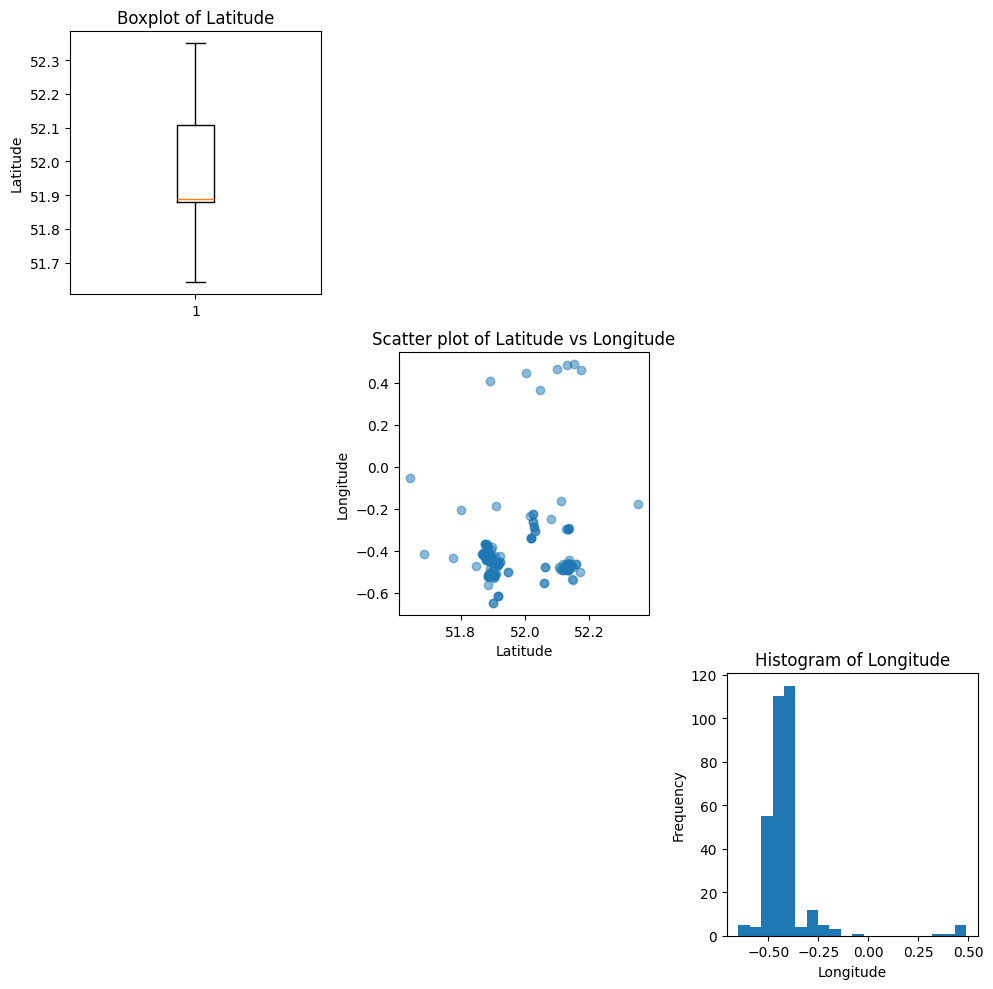

In [130]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# Boxplot ของ Latitude ใน subplot แรก (แนวทแยงมุม)
axes[0, 0].boxplot(stopandsearch_df['Latitude'].dropna())
axes[0, 0].set_title('Boxplot of Latitude')
axes[0, 0].set_ylabel('Latitude')

# Scatter plot ของ Latitude vs Longitude ใน subplot ที่สอง (แนวทแยงมุม)
axes[1, 1].scatter(stopandsearch_df['Latitude'], stopandsearch_df['Longitude'], alpha=0.5)
axes[1, 1].set_title('Scatter plot of Latitude vs Longitude')
axes[1, 1].set_xlabel('Latitude')
axes[1, 1].set_ylabel('Longitude')

# Histogram ของ Longitude ใน subplot ที่สาม (แนวทแยงมุม)
axes[2, 2].hist(stopandsearch_df['Longitude'].dropna(), bins=20)
axes[2, 2].set_title('Histogram of Longitude')
axes[2, 2].set_xlabel('Longitude')
axes[2, 2].set_ylabel('Frequency')

# ปิด subplot ที่ไม่ได้ใช้งาน (นอกแนวทแยงมุม)
axes[0, 1].axis('off')
axes[0, 2].axis('off')
axes[1, 0].axis('off')
axes[1, 2].axis('off')
axes[2, 0].axis('off')
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()